
## HW7 (answer key)
### [NYC property sales](https://www.kaggle.com/new-york-city/nyc-property-sales) : Random Forest Regression model 

Instructor: [Pedram Jahangiry](https://github.com/PJalgotrader) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()  

In [2]:
rand_state= 1000

### Data Preprocessing

In [3]:
df = pd.read_csv("nyc-rolling-sales_clean.csv")
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [4]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NAs

In [5]:
# constructing the categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'sale_month']

for col in categorical: 
    df[col] = df[col].astype("category").cat.codes

In [6]:
list(df.columns)

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE',
 'sale_year',
 'sale_month']

In [7]:
# Let's drop the variables that we don't use in our linear regression model

df = df.drop(['sale_year','SALE DATE','TOTAL UNITS'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 15 columns):
BOROUGH                           30236 non-null int8
NEIGHBORHOOD                      30236 non-null int16
BUILDING CLASS CATEGORY           30236 non-null int8
TAX CLASS AT PRESENT              30236 non-null int8
BUILDING CLASS AT PRESENT         30236 non-null int8
ZIP CODE                          30236 non-null int16
RESIDENTIAL UNITS                 30236 non-null int64
COMMERCIAL UNITS                  30236 non-null int64
LAND SQUARE FEET                  30236 non-null float64
GROSS SQUARE FEET                 30236 non-null float64
YEAR BUILT                        30236 non-null int16
TAX CLASS AT TIME OF SALE         30236 non-null int8
BUILDING CLASS AT TIME OF SALE    30236 non-null int8
SALE PRICE                        30236 non-null float64
sale_month                        30236 non-null int8
dtypes: float64(3), int16(3), int64(2), int8(7)
memory usage: 1.5 M

In [9]:
df.isnull().sum() / len(df)
# Alternatively we could use isnull() from pandas. 
# pd.isnull(df).sum() 

BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BUILDING CLASS AT PRESENT         0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
sale_month                        0.0
dtype: float64

### Plotting the NA values

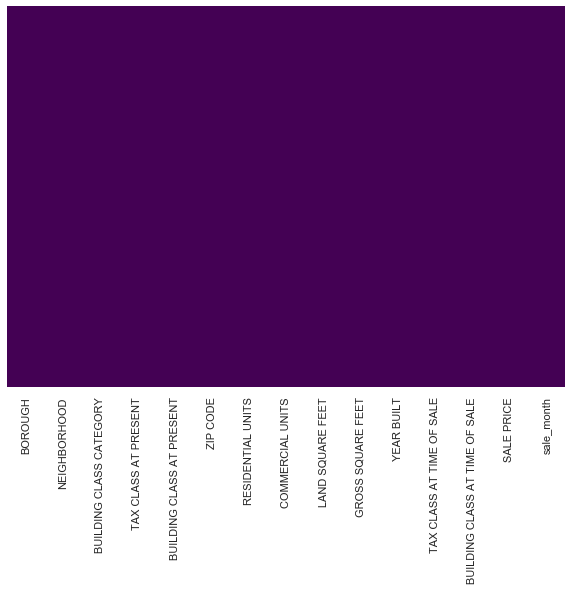

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Defining the variables and splitting the data

In [11]:
df.shape

(30236, 15)

In [12]:
df['lsales']=np.log(df['SALE PRICE'])

In [13]:
y = df['lsales']
X = df.drop(['lsales','SALE PRICE'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [14]:
X_train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,sale_month
15308,3,12,0,0,100,127,1,1,2500.0,1024.0,49,0,100,2
30014,4,228,1,0,10,46,2,0,4800.0,2268.0,39,0,10,10
22437,3,188,2,0,13,170,3,0,4000.0,2075.0,48,0,13,0
14045,1,232,1,0,12,87,2,0,1310.0,1500.0,39,0,12,11
29096,4,202,0,0,1,39,1,0,2821.0,920.0,39,0,1,8


## Random Forest Regression with Scikit-Learn

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
RF_regressor = RandomForestRegressor(n_estimators = 100, max_features='sqrt', random_state=100)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [17]:
# Predicting the Test set results
y_pred_test = RF_regressor.predict(X_test)

###  Evaluating the Random Forests Regression model on test dataset¶


## Question 1: 
1- Use RandomForestRegressor() model from Sklearn package and report the RMSE_te (RMSE of the test set) of your model. Note that since y_test is observable, you don't need to estimate this number using CV.

In [18]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

0.25

In [19]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.5

## Extra: 
Let's sstimate the RMSE_te using K-Fold Cross Validation technique (try K=5 and K=10). Compare this RMSE_CV with the RMSE_te from part 1.

In [20]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [21]:
RMSE_CV=[]
K = (5,10)
for i in K:
    NMSE = cross_val_score(estimator = RF_regressor, X = X_train, y = y_train, cv = i , scoring="neg_mean_squared_error" )
    RMSE_CV.append(round(np.sqrt(-NMSE).mean(),2))

RMSE_CV_df = pd.DataFrame(K, columns=['K'])
RMSE_CV_df['RMSE_CV']=RMSE_CV

RMSE_CV_df

,K,RMSE_CV
0,5,0.5
1,10,0.5


The cross validated estimate for RMSE_test is equal to 0.5 using k=5 or 10 which is very close to RMSE_test=0.5

## Question 2:  
Compare the RMSE_test from your random forest model with the RMSE_test from the linear regression model in HW3 ( Don't forget to set rand_state=1000)


**The RMSE_test using Linear regression model was 0.54 and the random forest version is 0.5. This is a significant improvement in log scale.**



## Question 3: 
 Plot the feature importance plot and make some comments! 

In [22]:
features= list(X_train.columns)
features

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'sale_month']

In [23]:
importances= RF_regressor.feature_importances_
importances

array([0.03827493, 0.10584285, 0.05005337, 0.01554782, 0.05173698,
       0.17402224, 0.0221178 , 0.00630826, 0.11339713, 0.19190015,
       0.09525235, 0.01158989, 0.0466232 , 0.07733303])

In [24]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importances})
FIM=FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
7,COMMERCIAL UNITS,0.006308
11,TAX CLASS AT TIME OF SALE,0.011590
3,TAX CLASS AT PRESENT,0.015548
6,RESIDENTIAL UNITS,0.022118
0,BOROUGH,0.038275
12,BUILDING CLASS AT TIME OF SALE,0.046623
2,BUILDING CLASS CATEGORY,0.050053
4,BUILDING CLASS AT PRESENT,0.051737
13,sale_month,0.077333
10,YEAR BUILT,0.095252


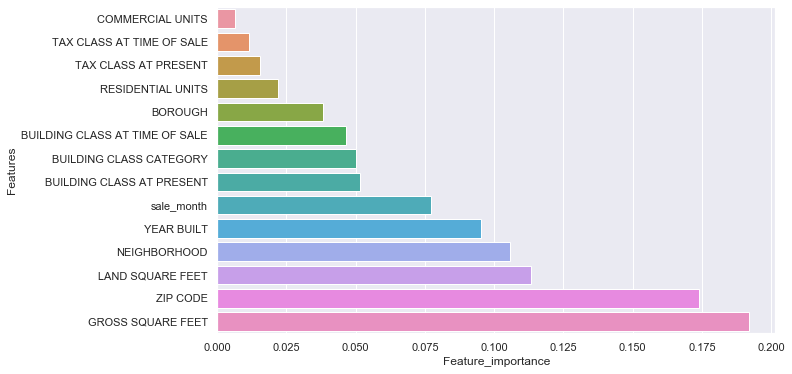

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(y='Features', x='Feature_importance', data=FIM)

From the Feature importance plot, it seems that Gross Square Feet and Zip code have the most impact on average reduction in RSS when expanding the decision trees. Commercial units and tax class at time of sale have the lowest impact respectively. 

--------

## Further discussion:

There is an alternative way of handling the categorical variables. We could have turned them into dummy variables and rerun the whole RF regression model. Let's do it here: 

In [26]:
df2 = pd.read_csv("nyc-rolling-sales_clean.csv")

In [27]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df2[col] = pd.to_numeric(df2[col], errors='coerce') # coercing errors to NAs

In [28]:
# constructing the categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'sale_month']

for col in categorical: 
    df2[col] = df2[col].astype("category")

Note that the difference here is that we are not coding the categorical variables to numbers like 1,2,3,4 and 5 for Borough. Instead we are going to do **one-hot-encoding** meaning that we are going to make the categorical variables into dummy variables.

In [29]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.shape

(30236, 1170)

Now we have 1169 features instead of only 14 features! Finally let's apply random forest model to df2.

In [30]:
df2['lsales']=np.log(df2['SALE PRICE'])
y = df2['lsales']
X = df2.drop(['lsales','SALE PRICE'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [31]:
RF_regressor = RandomForestRegressor(n_estimators = 100, max_features='sqrt', random_state=100)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [32]:
# Predicting the Test set results
y_pred_test = RF_regressor.predict(X_test)

###  Evaluating the Random Forests Regression model on test dataset¶ and plotting the feature importance for 1170 features!


In [33]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.5

As you can see, the answers are very close to each other. In both cases, the RMSE_test = 0.5

In [34]:
features= list(X_train.columns)

In [35]:
importances= RF_regressor.feature_importances_
importances

array([0.01799147, 0.00788772, 0.01427079, ..., 0.00418988, 0.00437411,
       0.00450202])

In [36]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importances})
FIM=FIM.sort_values(by=['Feature_importance'], ascending=False)
FIM

,Features,Feature_importance
4,GROSS SQUARE FEET,8.222125e-02
3,LAND SQUARE FEET,5.367536e-02
6,BOROUGH_Brooklyn,3.022880e-02
0,RESIDENTIAL UNITS,1.799147e-02
2,TOTAL UNITS,1.427079e-02
283,BUILDING CLASS CATEGORY_44 CONDO PARKING ...,1.060404e-02
716,TAX CLASS AT TIME OF SALE_2,8.405626e-03
9,BOROUGH_Staten Island,8.270029e-03
5,sale_year,8.040624e-03
505,ZIP CODE_11215,7.995483e-03


Let's plot the top 20 most important features out of 1169 features

In [37]:
FIM.iloc[0:20]

,Features,Feature_importance
4,GROSS SQUARE FEET,0.082221
3,LAND SQUARE FEET,0.053675
6,BOROUGH_Brooklyn,0.030229
0,RESIDENTIAL UNITS,0.017991
2,TOTAL UNITS,0.014271
283,BUILDING CLASS CATEGORY_44 CONDO PARKING ...,0.010604
716,TAX CLASS AT TIME OF SALE_2,0.008406
9,BOROUGH_Staten Island,0.008270
5,sale_year,0.008041
505,ZIP CODE_11215,0.007995


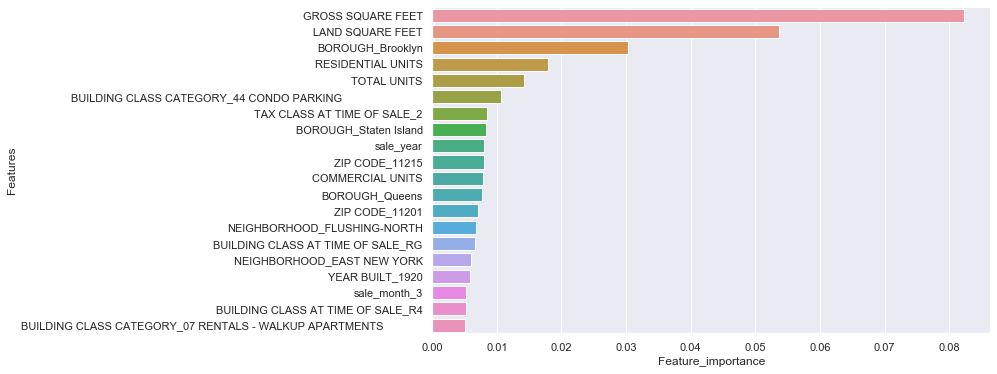

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(y='Features', x='Feature_importance', data=FIM.iloc[0:20])

## Question:
Which way of dealing with categorical variables makes more sense to you? When do you think we should use either of them?